In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Project_of_datascience/phosphate36.csv")

In [5]:
df.shape

(206, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Mois                                                     206 non-null    object
 1   Phosphate Price (Dollars américains par tonne métrique)  206 non-null    object
 2   Diesel Price (Dollars US par gallon)                     206 non-null    object
 3   Phosphate ROC                                            206 non-null    object
 4   Diesel ROC                                               206 non-null    object
 5   Phosphate/Diesel Price Ratio                             206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


In [7]:
df[["Month", "Year"]] = df["Mois"].str.split(" ", n=1, expand=True)

In [8]:
df.head()

,Mois,Phosphate Price (Dollars américains par tonne métrique),Diesel Price (Dollars US par gallon),Phosphate ROC,Diesel ROC,Phosphate/Diesel Price Ratio,Month,Year
0,juin 2006,"44,00","2,09",-,-,"210,426",juin,2006
1,juil. 2006,"44,00","2,22","0,00 %","6,03 %","19,8466",juil.,2006
2,août 2006,"44,00","2,25","0,00 %","1,35 %","19,5817",août,2006
3,sept. 2006,"44,00","1,81","0,00 %","-19,45 %","24,3094",sept.,2006
4,oct. 2006,"44,00","1,79","0,00 %","-0,88 %","24,5262",oct.,2006


In [9]:
df.isna().sum()

Mois                                                       0
Phosphate Price (Dollars américains par tonne métrique)    0
Diesel Price (Dollars US par gallon)                       0
Phosphate ROC                                              0
Diesel ROC                                                 0
Phosphate/Diesel Price Ratio                               0
Month                                                      0
Year                                                       0
dtype: int64

In [10]:
df['Phosphate ROC'] = df['Phosphate ROC'].replace('-', '0')
df['Phosphate ROC'] = df['Phosphate ROC'].str.replace(',', '.')

df['Diesel ROC'] = df['Diesel ROC'].replace('-', '0')
df['Diesel ROC'] = df['Diesel ROC'].str.replace(',', '.')

In [11]:
df['Diesel ROC'] = df['Diesel ROC'].str.rstrip('%').astype(float)

df['Phosphate ROC'] = df['Phosphate ROC'].str.rstrip('%').astype(float)

df['Diesel Price (Dollars US par gallon)'] = df['Diesel Price (Dollars US par gallon)'].str.replace(',', '.').astype(float)

df['Phosphate Price (Dollars américains par tonne métrique)'] = df['Phosphate Price (Dollars américains par tonne métrique)'].astype(str).str.replace(',', '.').astype(float)


In [12]:
df['Phosphate/Diesel Price Ratio'] = df['Phosphate/Diesel Price Ratio'].str.replace(',', '.')

In [13]:
df['Phosphate/Diesel Price Ratio'] = df['Phosphate/Diesel Price Ratio'].astype(float)

In [14]:
df.drop(columns=["Mois"], inplace=True)

In [15]:
month_mapping = {
    'janv': 'January',
    'févr': 'February',
    'mars': 'March',
    'avr': 'April',
    'mai': 'May',
    'juin': 'June',
    'juil.': 'July',
    'juil': 'July',
    'août': 'August',
    'sept.': 'September',
    'sept': 'September',
    'oct.': 'October',
    'oct': 'October',
    'nov.': 'November',
    'nov': 'November',
    'déc.': 'December',
    'déc': 'December'
}

df['Month'] = df['Month'].apply(lambda x: month_mapping[re.search(r'[a-zA-Zéû]+', str(x)).group()] if pd.notnull(x) else x)


In [16]:
df.head()

,Phosphate Price (Dollars américains par tonne métrique),Diesel Price (Dollars US par gallon),Phosphate ROC,Diesel ROC,Phosphate/Diesel Price Ratio,Month,Year
0,44.0,2.09,0.0,0.00,210.4260,June,2006
1,44.0,2.22,0.0,6.03,19.8466,July,2006
2,44.0,2.25,0.0,1.35,19.5817,August,2006
3,44.0,1.81,0.0,-19.45,24.3094,September,2006
4,44.0,1.79,0.0,-0.88,24.5262,October,2006


In [17]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['Month'] = df['Month'].apply(lambda x: month_mapping[re.search(r'[a-zA-Zéû]+', str(x)).group()] if pd.notnull(x) else x)

In [18]:
df.head()

,Phosphate Price (Dollars américains par tonne métrique),Diesel Price (Dollars US par gallon),Phosphate ROC,Diesel ROC,Phosphate/Diesel Price Ratio,Month,Year
0,44.0,2.09,0.0,0.00,210.4260,6,2006
1,44.0,2.22,0.0,6.03,19.8466,7,2006
2,44.0,2.25,0.0,1.35,19.5817,8,2006
3,44.0,1.81,0.0,-19.45,24.3094,9,2006
4,44.0,1.79,0.0,-0.88,24.5262,10,2006


In [19]:
df.describe()

,Phosphate Price (Dollars américains par tonne métrique),Diesel Price (Dollars US par gallon),Phosphate ROC,Diesel ROC,Phosphate/Diesel Price Ratio,Month
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,139.273883,2.295971,1.729612,0.498932,64.906150,6.500000
std,89.170808,0.749566,13.270281,8.937275,49.124603,3.443977
min,44.000000,0.880000,-54.550000,-26.630000,19.581700,1.000000
25%,87.500000,1.800000,-0.275000,-4.367500,41.671525,4.000000
50%,110.500000,2.120000,0.000000,0.850000,54.475250,6.500000
75%,169.845000,2.940000,2.502500,5.762500,66.457600,9.000000
max,450.000000,4.650000,124.310000,31.620000,344.563500,12.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Phosphate Price (Dollars américains par tonne métrique)  206 non-null    float64
 1   Diesel Price (Dollars US par gallon)                     206 non-null    float64
 2   Phosphate ROC                                            206 non-null    float64
 3   Diesel ROC                                               206 non-null    float64
 4   Phosphate/Diesel Price Ratio                             206 non-null    float64
 5   Month                                                    206 non-null    int64  
 6   Year                                                     206 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 11.4+ KB


In [21]:
df['Year'] = df['Year'].astype(int)

In [22]:
df.head()

,Phosphate Price (Dollars américains par tonne métrique),Diesel Price (Dollars US par gallon),Phosphate ROC,Diesel ROC,Phosphate/Diesel Price Ratio,Month,Year
0,44.0,2.09,0.0,0.00,210.4260,6,2006
1,44.0,2.22,0.0,6.03,19.8466,7,2006
2,44.0,2.25,0.0,1.35,19.5817,8,2006
3,44.0,1.81,0.0,-19.45,24.3094,9,2006
4,44.0,1.79,0.0,-0.88,24.5262,10,2006


In [23]:
df.to_csv("/content/drive/MyDrive/Project_of_datascience/phosphate_clean.csv")

In [25]:
data = df

In [23]:
import plotly.express as px

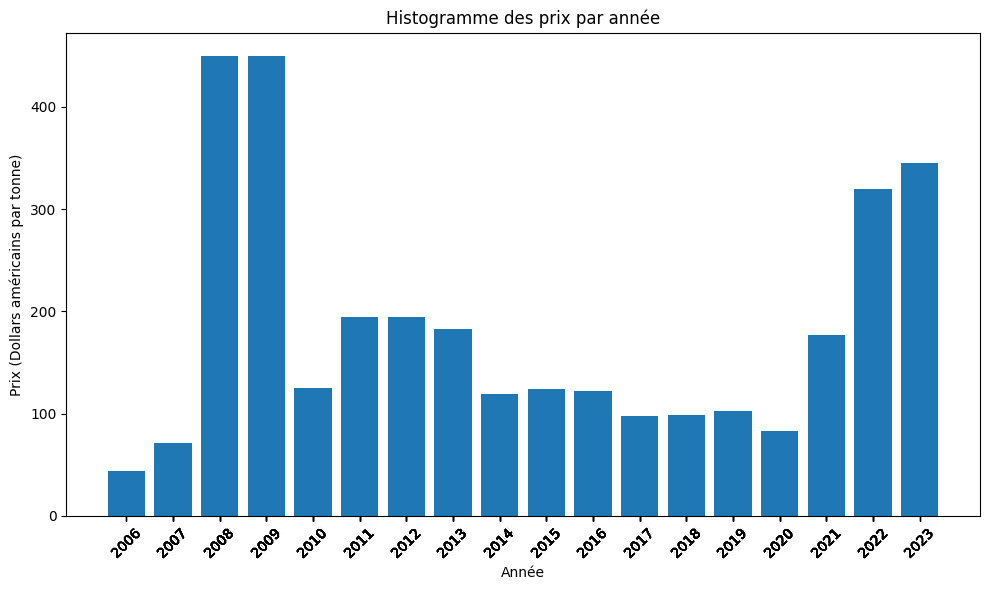

In [27]:
df = pd.DataFrame(data)

# Créer un histogramme
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.bar(df['Year'], df['Phosphate Price (Dollars américains par tonne métrique)'])
plt.xlabel('Année')
plt.ylabel('Prix (Dollars américains par tonne)')
plt.title('Histogramme des prix par année')
plt.xticks(df['Year'], rotation=45)  # Rotation des étiquettes de l'axe des x pour la lisibilité

plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()

In [ ]:
# Créer un nuage de points
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.scatter(df['Year'], df['Phosphate Price (Dollars américains par tonne métrique)'])
plt.xlabel('Année')
plt.ylabel('Prix (Dollars américains par tonne)')
plt.title('Nuage de Points de la Demande par Année et Produit')
plt.xticks(df['Year'], rotation=45)  # Rotation des étiquettes de l'axe des x pour la lisibilité

plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()

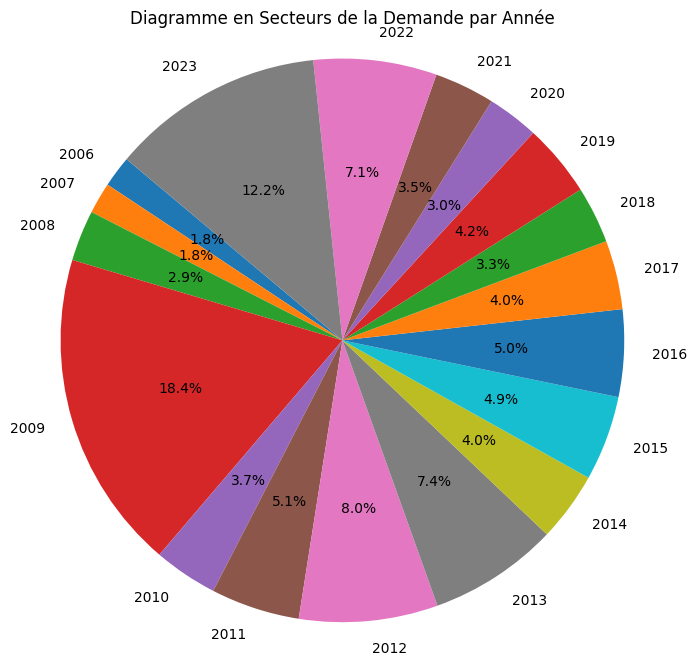

In [28]:

df_unique_years = df.drop_duplicates(subset=['Year'])

plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df_unique_years['Phosphate Price (Dollars américains par tonne métrique)'], labels=df_unique_years['Year'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Diagramme en Secteurs de la Demande par Année')

plt.show()

<Figure size 1200x600 with 0 Axes>

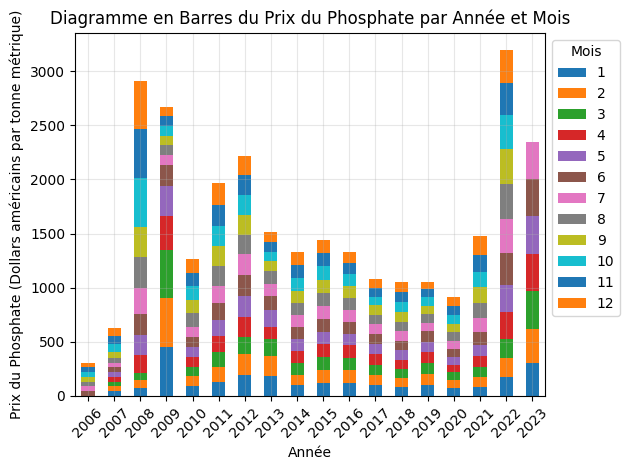

In [29]:
df_pivot = df.pivot(index='Year', columns='Month', values='Phosphate Price (Dollars américains par tonne métrique)')

# Create a bar chart with enhanced visibility
plt.figure(figsize=(12, 6))

# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Année')
plt.ylabel('Prix du Phosphate (Dollars américains par tonne métrique)')
plt.title('Diagramme en Barres du Prix du Phosphate par Année et Mois')
plt.xticks(rotation=45)
plt.legend(title='Mois', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

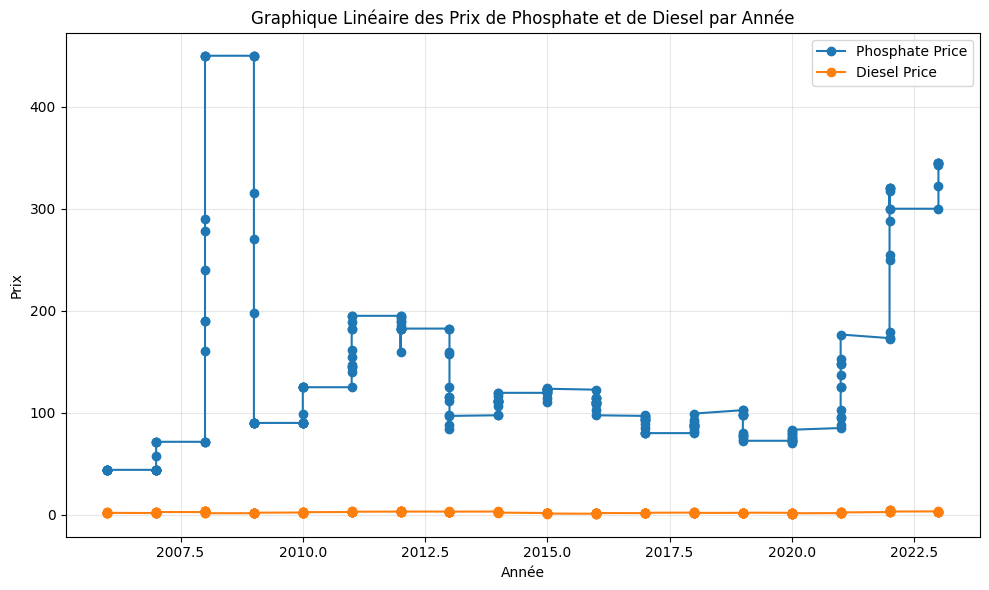

In [30]:
plt.figure(figsize=(10, 6))

# Plot lines for Phosphate Price and Diesel Price
plt.plot(df['Year'], df['Phosphate Price (Dollars américains par tonne métrique)'], marker='o', label='Phosphate Price')
plt.plot(df['Year'], df['Diesel Price (Dollars US par gallon)'], marker='o', label='Diesel Price')

# Customize the plot
plt.xlabel('Année')
plt.ylabel('Prix')
plt.title('Graphique Linéaire des Prix de Phosphate et de Diesel par Année')
plt.legend()

# Show the plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


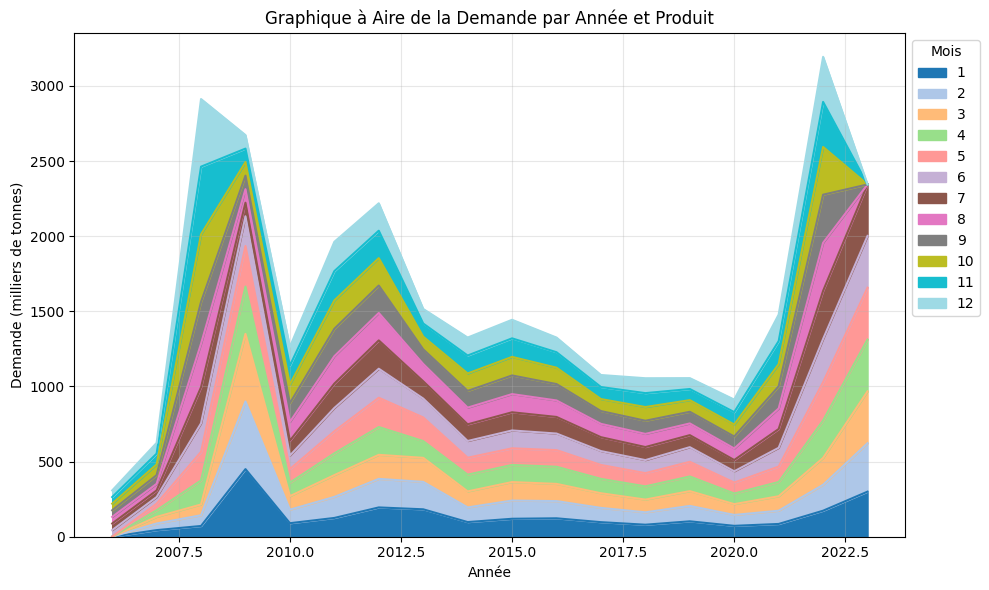

In [31]:

df_pivot = df.pivot(index='Year', columns='Month', values='Phosphate Price (Dollars américains par tonne métrique)')

ax = df_pivot.plot(kind='area', stacked=True, figsize=(10, 6), cmap='tab20')

plt.xlabel('Année')
plt.ylabel('Demande (milliers de tonnes)')
plt.title('Graphique à Aire de la Demande par Année et Produit')
plt.legend(title='Mois', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()



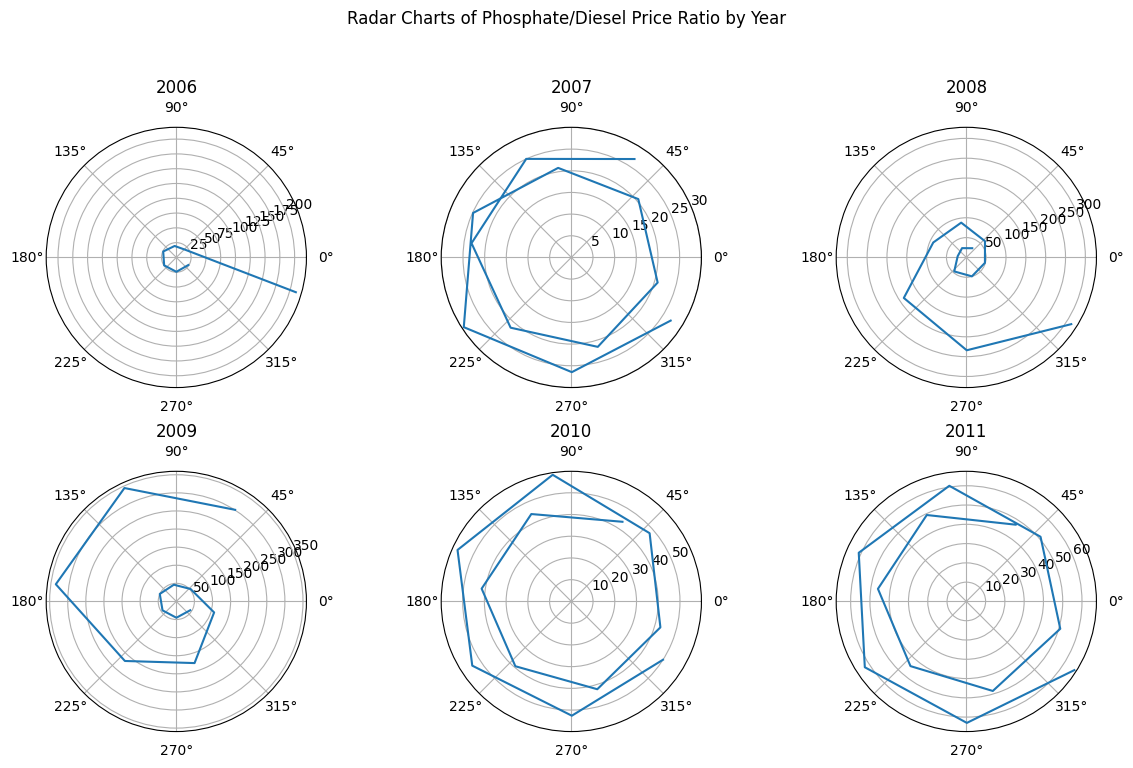

In [32]:
#Créer un graphique radar
df_pivot = df.pivot(index='Month', columns='Year', values='Phosphate/Diesel Price Ratio')
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw=dict(polar=True))

# Loop through the axes and plot the radar charts
for i, ax in enumerate(axes.flat):
    if i < len(df_pivot.columns):
        ax.plot(df_pivot.index, df_pivot[df_pivot.columns[i]])
        ax.set_title(df_pivot.columns[i])
    else:
        ax.axis('off')  # Hide empty subplots

# Add a common title
plt.suptitle('Radar Charts of Phosphate/Diesel Price Ratio by Year')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

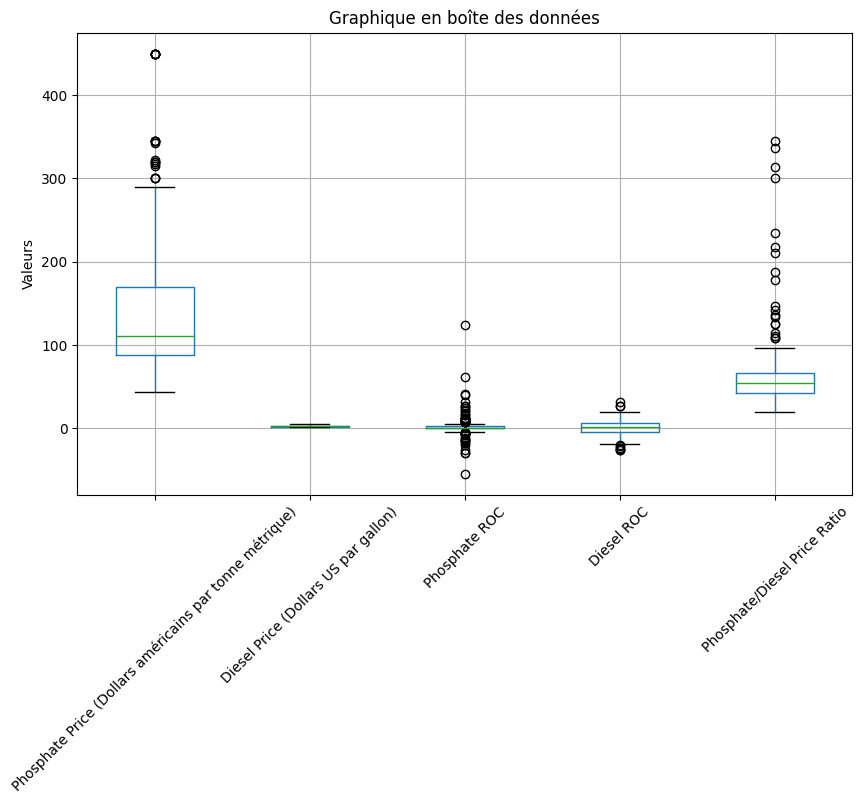

In [33]:
# Créer le graphique en boîte
plt.figure(figsize=(10, 6))
df.boxplot(column=["Phosphate Price (Dollars américains par tonne métrique)", "Diesel Price (Dollars US par gallon)", "Phosphate ROC", "Diesel ROC", "Phosphate/Diesel Price Ratio"])
plt.title("Graphique en boîte des données")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.show()

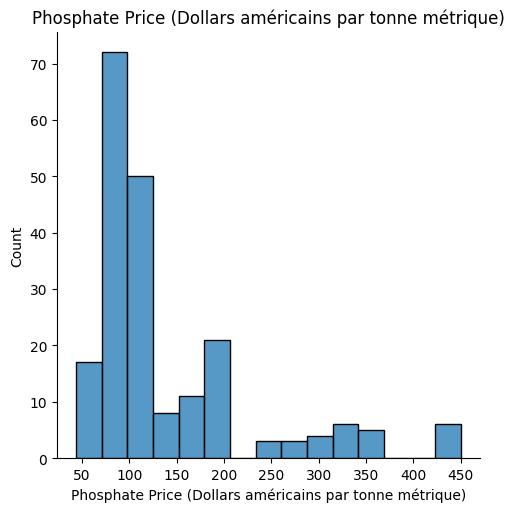

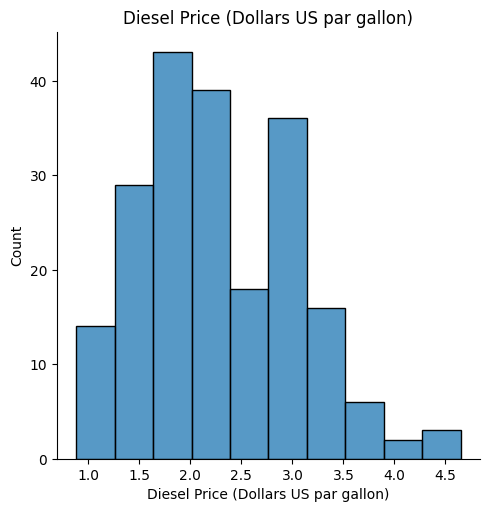

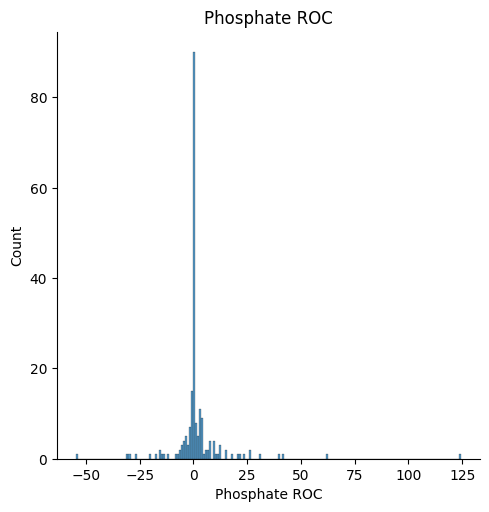

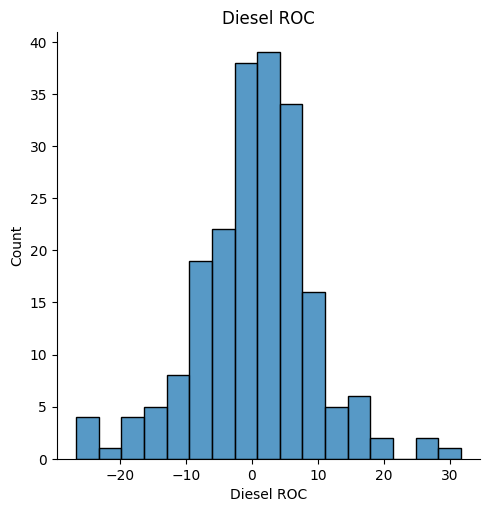

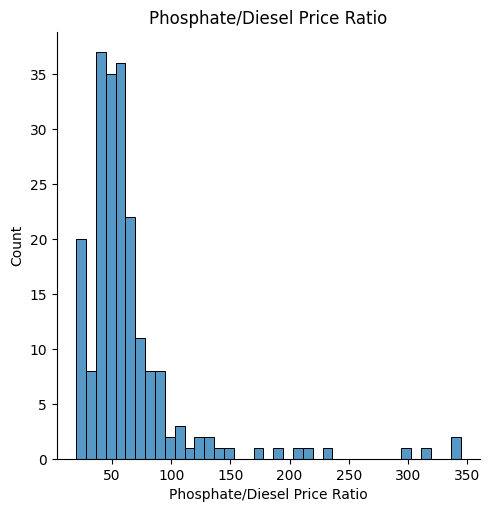

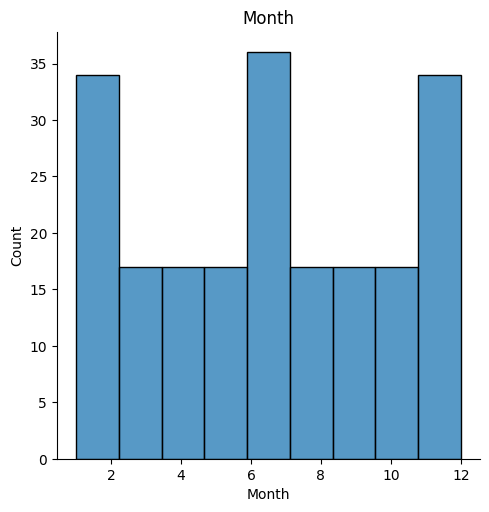

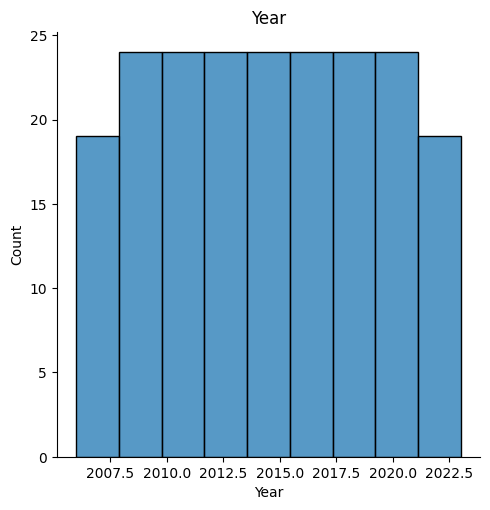

In [34]:
for i in df.columns:
   sns.displot(df[i])
   plt.title(i)
   plt.show()

 skewness is a measure of symmetry or asymmetry of data distribution, and kurtosis measures whether data is heavy-tailed or light-tailed in a distribution

Rule of thumb :

If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.


If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.


If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

Leptokurtic (Kurtosis > 3)
Leptokurtic has very long and thick tails, which means there are more chances of outliers. Positive values of kurtosis indicate that distribution is peaked and possesses thick tails. Extremely positive kurtosis indicates a distribution where more numbers are located in the tails of the distribution instead of around the mean.

Platykurtic (Kurtosis < 3)
Platykurtic having a thin tail and stretched around the center means most data points are present in high proximity to the mean. A platykurtic distribution is flatter (less peaked) when compared with the normal distribution.

Mesokurtic (Kurtosis = 3)
Mesokurtic is the same as the normal distribution, which means kurtosis is near 0. In Mesokurtic, distributions are moderate in breadth, and curves are a medium peaked height.

In [35]:
#skewness and kurtosis
print("Skewness: %f" % df['Phosphate Price (Dollars américains par tonne métrique)'].skew())
print("Kurtosis: %f" % df['Phosphate Price (Dollars américains par tonne métrique)'].kurt())

Skewness: 1.820071
Kurtosis: 3.099057


In [36]:
df.corr()["Phosphate Price (Dollars américains par tonne métrique)"].sort_values(ascending = False)

Phosphate Price (Dollars américains par tonne métrique)    1.000000
Phosphate/Diesel Price Ratio                               0.764849
Diesel Price (Dollars US par gallon)                       0.353809
Phosphate ROC                                              0.130573
Year                                                       0.113930
Month                                                     -0.024070
Diesel ROC                                                -0.199109
Name: Phosphate Price (Dollars américains par tonne métrique), dtype: float64

<Axes: >

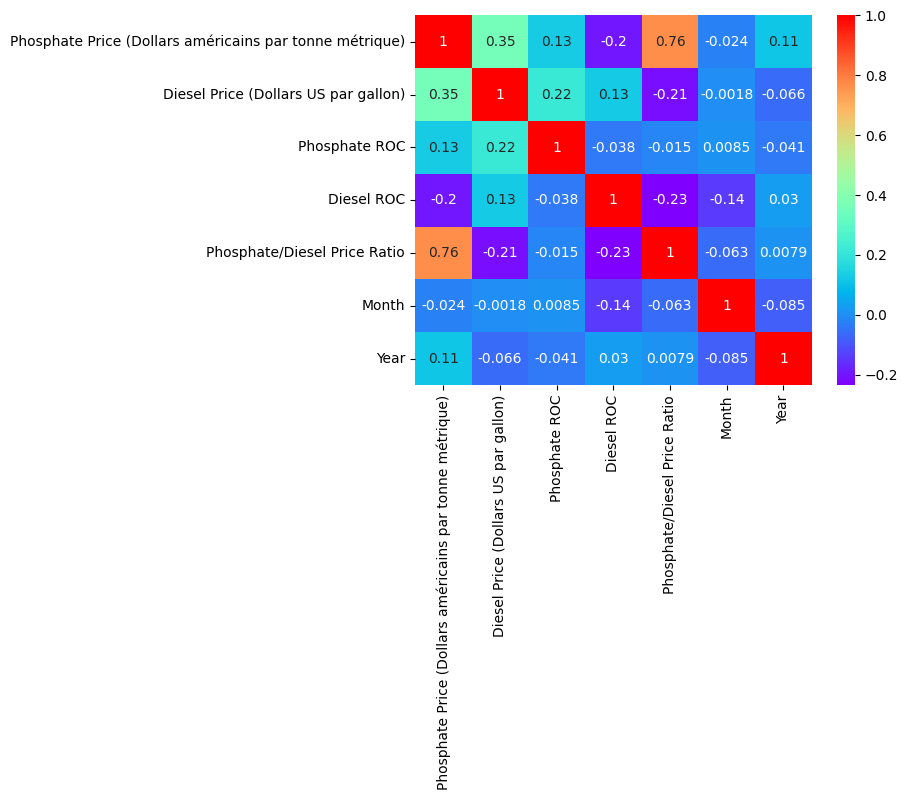

In [37]:
sns.heatmap(df.corr(), annot=True , cmap = "rainbow")

In [38]:
X = df[["Month","Year","Diesel Price (Dollars US par gallon)", "Diesel ROC","Phosphate/Diesel Price Ratio"]]

y = df['Phosphate Price (Dollars américains par tonne métrique)']

In [39]:
X

,Month,Year,Diesel Price (Dollars US par gallon),Diesel ROC,Phosphate/Diesel Price Ratio
0,6,2006,2.09,0.00,210.4260
1,7,2006,2.22,6.03,19.8466
2,8,2006,2.25,1.35,19.5817
3,9,2006,1.81,-19.45,24.3094
4,10,2006,1.79,-0.88,24.5262
...,...,...,...,...,...
201,3,2023,2.75,-3.00,125.5916
202,4,2023,2.59,-5.61,133.0505
203,5,2023,2.35,-9.53,147.0588
204,6,2023,2.43,3.67,141.6530


In [40]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.26, random_state=0)

In [41]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [42]:
mlr_score = mlr.score(x_test, y_test)
pred_mlr = mlr.predict(x_test)
print("Multiple Linear Regression Model Score:", round(mlr_score * 100, 2))

Multiple Linear Regression Model Score: 93.04


In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_gridsvr = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear' , 'rbf' , 'polt'], 'gamma':['scale' , 'auto'],'degree':[2,3,4,5]}
gridsvr = GridSearchCV(svr , param_gridsvr)
gridsvr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'polt']})

In [44]:
gridsvr.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [45]:
svm_score = gridsvr.score(x_test, y_test)
pred_svm = gridsvr.predict(x_test)
print("SVM Model Score:", round(svm_score * 100, 2))

SVM Model Score: 88.19


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=0)
RFR = RandomForestRegressor(n_estimators=28, random_state=0)
RFR.fit(X_train,y_train)

RandomForestRegressor(n_estimators=28, random_state=0)

In [47]:
RFR_score = RFR.score(X_test, y_test)
pred_RFR = RFR.predict(X_test)
print("Random Forest Regressor Model Score:", round(RFR_score * 100, 2))

Random Forest Regressor Model Score: 96.81


In [48]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
dtr_score = DTR.score(X_test, y_test)
pred_dtr = DTR.predict(x_test)
print("Decision Tree Regressor Model Score:", round(dtr_score * 100, 2))

Decision Tree Regressor Model Score: 90.73


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [50]:
input_test = pd.DataFrame({ 'Month':[7],
    'Year': [2024],
    'Diesel Price (Dollars US par gallon)': [2.43],
    'Diesel ROC':[3.67],
    'Phosphate/Diesel Price Ratio': [141.65]
 })

input = scaler.transform(input_test)


pred_mlr_july = mlr.predict(input)
pred_svm_july = gridsvr.predict(input)
pred_RFR_july = RFR.predict(input_test)
pred_DTR_july = DTR.predict(input_test)



print("Predicted Phosphate Price for July 2024 (MLR):", pred_mlr_july[0])
print("Predicted Phosphate Price for July 2024 (SVM):", pred_svm_july[0])
print("Predicted Phosphate Price for July 2024 (RFR):", pred_RFR_july[0])
print("Predicted Phosphate Price for July 2024 (DTR):", pred_DTR_july[0])

Predicted Phosphate Price for July 2024 (MLR): 297.53776489329255
Predicted Phosphate Price for July 2024 (SVM): 238.04556532753622
Predicted Phosphate Price for July 2024 (RFR): 317.6607142857143
Predicted Phosphate Price for July 2024 (DTR): 344.5


In [51]:
import pickle

In [52]:
pickle.dump(mlr, open('/content/drive/MyDrive/Project_of_datascience/model_mlr.pkl', 'wb'))
pickle.dump(RFR, open('/content/drive/MyDrive/Project_of_datascience/model_RFR.pkl', 'wb'))
pickle.dump(mlr, open('/content/drive/MyDrive/Project_of_datascience/model_DTR.pkl', 'wb'))